<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/blob/main/Actividad_Semanal_6%2C_visualizaci%C3%B3n_A01793708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Prof. Titular: María de la Paz Rico Fernández
###Prof. Tutor: Bernardo Charles Canales

### **Semana 6: Actividad Semanal -- 6, visualización**

**Alumno**: Juan Carlos García Rendón Martinez           
**Matrícula**: A01793708

# Bienvenido al notebook
1. Descarga los datos https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv y carga el dataset en tu libreta. 
Descripción : https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt


In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
# Para obtener los datos
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Definir la url de donde obtener los datos:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# Obtener la respuesta:
response = requests.get(url, stream=True)

df = pd.read_csv(url, sep=",")
df


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0



2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()



In [15]:
print(f"Shape: %s" % (df.shape,))

Shape: (30000, 25)


In [16]:
print(f"Columns: %s" %(df.columns,))

Columns: Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [17]:
print(f"Head: %s" %(df.head()))

Head:    ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 rows x 25 columns]


In [21]:
print(f"Data Types: %s" %(df.dtypes,)) 

Data Types: ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object


In [22]:
print(f"Info: %s" %(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [28]:
print(f"Is NA: %s" %(df.isna().values.any()))

Is NA: True


3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [29]:
df.dropna(axis=0, inplace=True)

In [30]:
print(f"Shape: %s" % (df.shape,))

Shape: (29958, 25)


4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [31]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [49]:
categoricas = ['X2', 'X3', 'X4','X6', 'X7','X8','X9','X10','X11']
numericas = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

X1
10000       493
16000         2
20000      1969
30000      1607
40000       229
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Length: 81, dtype: int64
count      29958.000000
mean      167555.900928
std       129737.299088
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: X1, dtype: float64


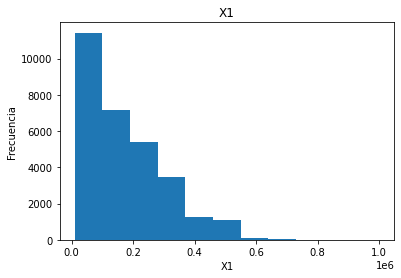

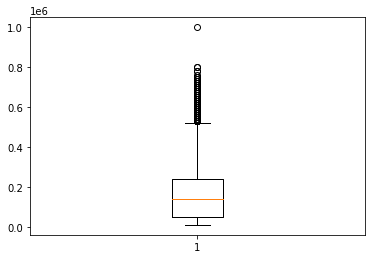



X5
21.0      67
22.0     559
23.0     931
24.0    1123
25.0    1184
26.0    1255
27.0    1475
28.0    1408
29.0    1601
30.0    1393
31.0    1216
32.0    1156
33.0    1145
34.0    1161
35.0    1113
36.0    1108
37.0    1040
38.0     943
39.0     954
40.0     868
41.0     820
42.0     794
43.0     669
44.0     700
45.0     617
46.0     569
47.0     498
48.0     466
49.0     450
50.0     411
51.0     339
52.0     304
53.0     325
54.0     246
55.0     208
56.0     177
57.0     122
58.0     122
59.0      83
60.0      67
61.0      56
62.0      44
63.0      31
64.0      31
65.0      24
66.0      25
67.0      16
68.0       5
69.0      15
70.0      10
71.0       3
72.0       3
73.0       4
74.0       1
75.0       2
79.0       1
dtype: int64
count    29958.000000
mean        35.483443
std          9.214319
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64


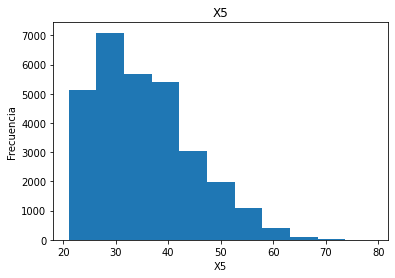

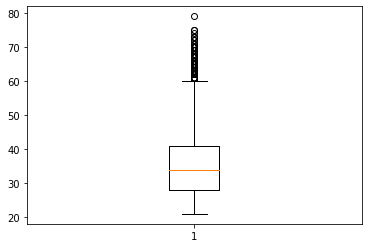



X12
-165580.0    1
-154973.0    1
-15308.0     1
-14386.0     1
-11545.0     1
            ..
 626648.0    1
 630458.0    1
 653062.0    1
 746814.0    1
 964511.0    1
Length: 22696, dtype: int64
count     29958.000000
mean      51248.119901
std       73674.949943
min     -165580.000000
25%        3559.250000
50%       22379.000000
75%       67190.000000
max      964511.000000
Name: X12, dtype: float64


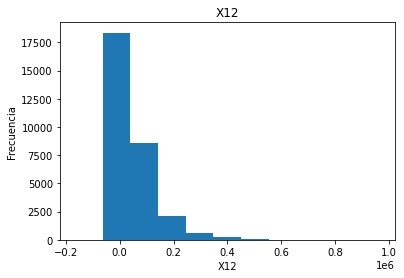

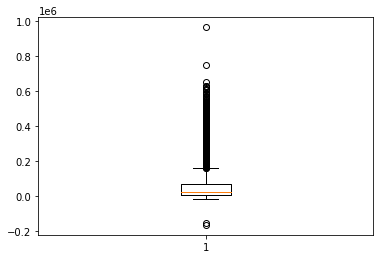



X13
-69777.0     1
-67526.0     1
-33350.0     1
-30000.0     1
-26214.0     1
            ..
 624475.0    1
 646770.0    1
 671563.0    1
 743970.0    1
 983931.0    1
Length: 22319, dtype: int64
count     29958.000000
mean      49200.493825
std       71211.232744
min      -69777.000000
25%        2984.000000
50%       21194.500000
75%       64027.750000
max      983931.000000
Name: X13, dtype: float64


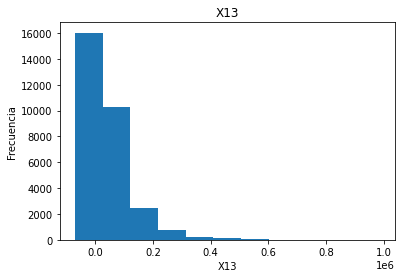

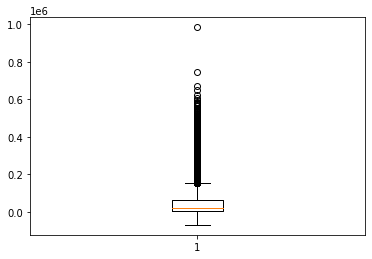



X14
-157264.0     1
-61506.0      1
-46127.0      1
-34041.0      1
-25443.0      1
             ..
 689627.0     1
 689643.0     1
 693131.0     1
 855086.0     1
 1664089.0    1
Length: 22002, dtype: int64
count    2.995800e+04
mean     4.703239e+04
std      6.938524e+04
min     -1.572640e+05
25%      2.664750e+03
50%      2.008550e+04
75%      6.018300e+04
max      1.664089e+06
Name: X14, dtype: float64


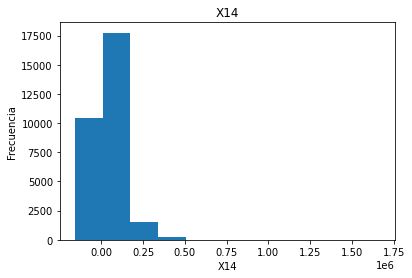

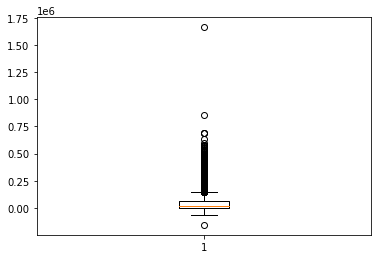



X15
-170000.0    1
-81334.0     1
-65167.0     1
-50616.0     1
-46627.0     1
            ..
 572805.0    1
 616836.0    1
 628699.0    1
 706864.0    1
 891586.0    1
Length: 21524, dtype: int64
count     29958.000000
mean      43279.335370
std       64364.684347
min     -170000.000000
25%        2327.500000
50%       19037.500000
75%       54551.250000
max      891586.000000
Name: X15, dtype: float64


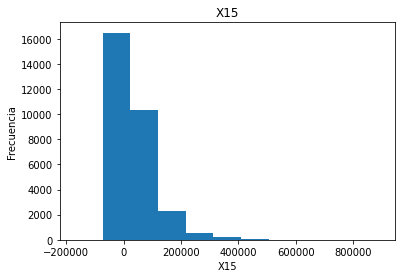

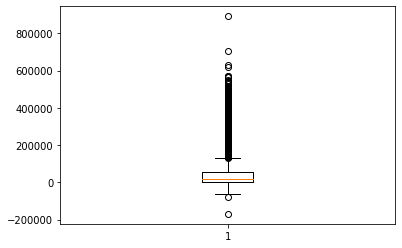



X16
-81334.0     1
-61372.0     1
-53007.0     1
-46627.0     1
-37594.0     1
            ..
 547880.0    1
 551702.0    1
 587067.0    1
 823540.0    1
 927171.0    1
Length: 20982, dtype: int64
count     29958.000000
mean      40328.984578
std       60826.219326
min      -81334.000000
25%        1762.250000
50%       18104.500000
75%       50220.750000
max      927171.000000
Name: X16, dtype: float64


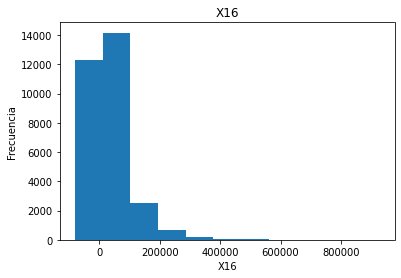

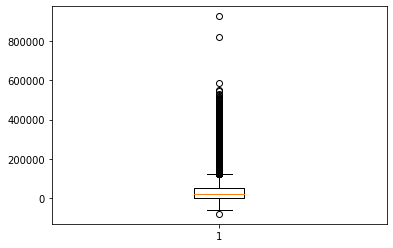



X17
-339603.0    1
-209051.0    1
-150953.0    1
-94625.0     1
-73895.0     1
            ..
 527566.0    1
 527711.0    1
 568638.0    1
 699944.0    1
 961664.0    1
Length: 20580, dtype: int64
count     29958.000000
mean      38889.925763
std       59582.883301
min     -339603.000000
25%        1256.000000
50%       17067.500000
75%       49234.750000
max      961664.000000
Name: X17, dtype: float64


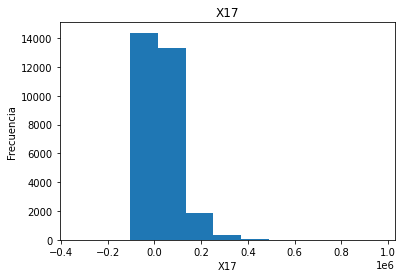

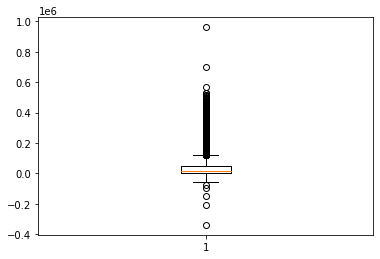



X18
0.0         5243
1.0            9
2.0           14
3.0           15
4.0           18
            ... 
405016.0       1
423903.0       1
493358.0       1
505000.0       1
873552.0       1
Length: 7938, dtype: int64
count     29958.000000
mean       5664.614460
std       16568.823518
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5007.000000
max      873552.000000
Name: X18, dtype: float64


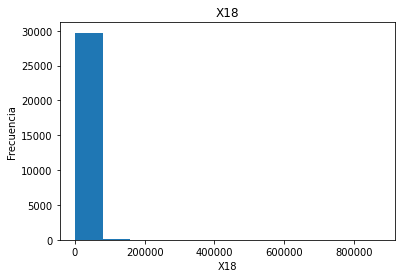

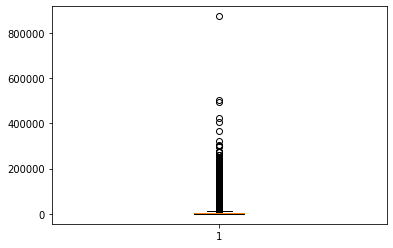



X19
0.0          5388
1.0            15
2.0            20
3.0            18
4.0            11
             ... 
580464.0        1
1024516.0       1
1215471.0       1
1227082.0       1
1684259.0       1
Length: 7895, dtype: int64
count    2.995800e+04
mean     5.925715e+03
std      2.305598e+04
min      0.000000e+00
25%      8.352500e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: X19, dtype: float64


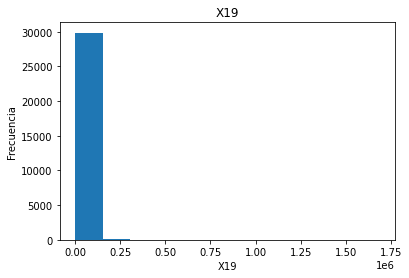

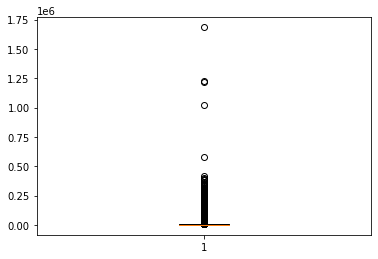



X20
0.0         5960
1.0           13
2.0           19
3.0           14
4.0           15
            ... 
400972.0       1
417588.0       1
508229.0       1
889043.0       1
896040.0       1
Length: 7513, dtype: int64
count     29958.000000
mean       5228.429969
std       17617.338167
min           0.000000
25%         390.000000
50%        1800.000000
75%        4511.500000
max      896040.000000
Name: X20, dtype: float64


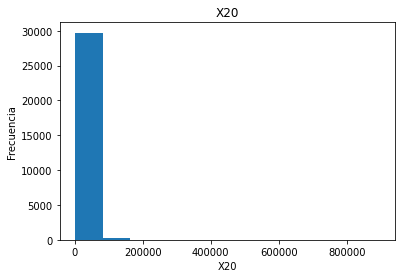

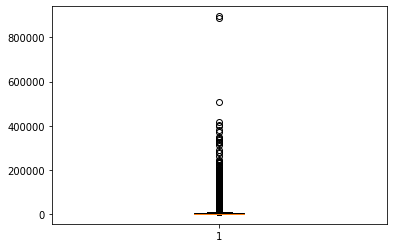



X21
0.0         6396
1.0           22
2.0           22
3.0           13
4.0           20
            ... 
400046.0       1
432130.0       1
497000.0       1
528897.0       1
621000.0       1
Length: 6936, dtype: int64
count     29958.000000
mean       4829.873556
std       15676.205514
min           0.000000
25%         296.250000
50%        1500.000000
75%        4014.750000
max      621000.000000
Name: X21, dtype: float64


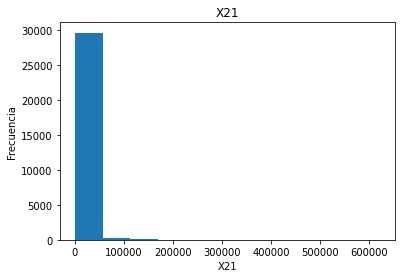

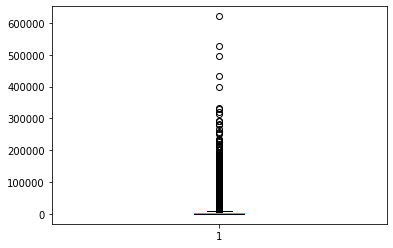



X22
0.0         6693
1.0           21
2.0           13
3.0           13
4.0           12
            ... 
332000.0       1
379267.0       1
388071.0       1
417990.0       1
426529.0       1
Length: 6890, dtype: int64
count     29958.000000
mean       4801.481574
std       15285.552652
min           0.000000
25%         253.250000
50%        1500.000000
75%        4040.000000
max      426529.000000
Name: X22, dtype: float64


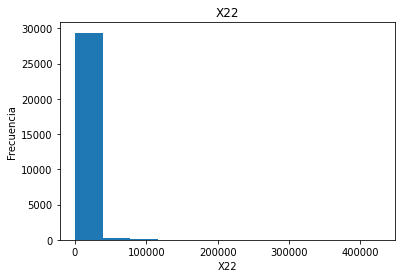

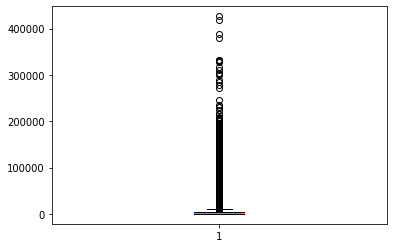



X23
0.0         7160
1.0           20
2.0            9
3.0           14
4.0           12
            ... 
403500.0       1
422000.0       1
443001.0       1
527143.0       1
528666.0       1
Length: 6935, dtype: int64
count     29958.000000
mean       5220.708025
std       17788.983767
min           0.000000
25%         118.000000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: X23, dtype: float64


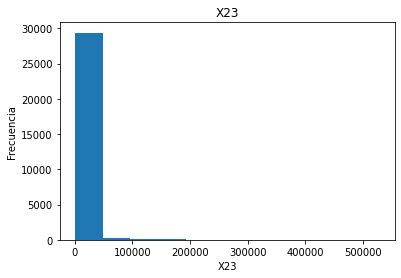

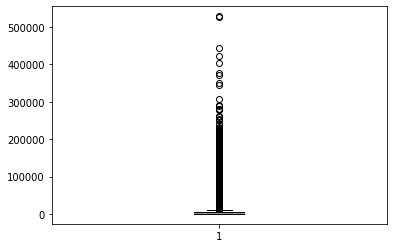

In [47]:
import matplotlib.pyplot as plt

#Calcularemos para las variables numéricas sus histogramas y boxplots
for f in df[numericas].columns:
  print (df.groupby([f]).size())
  print(df[f].describe(include='all'))
  plt.hist(df[f], bins=11)
  plt.xlabel(f) 
  plt.ylabel('Frecuencia') 
  plt.title(f)
  plt.show()
  print("\n")
  plt.boxplot(df[f])
  plt.show()
  print("\n")

  #Tras graficar y validar todas las variables se observa que la mayoría de los datos se encuentran distribuidos del lado izquierdo como distribución Logaritmica y no  tan Normal
  #Tambien se observa visualmente que los outliers se alejan muchísimo de la media
  

5. Realiza el conteo de las variables categóricas

X2
1.0    11863
2.0    18095
dtype: int64
count    29958.000000
mean         1.604012
std          0.489070
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: X2, dtype: float64


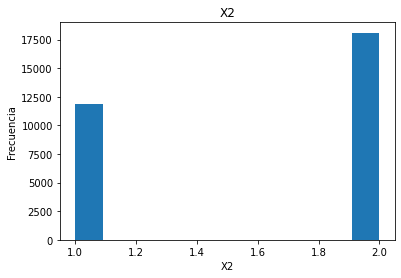

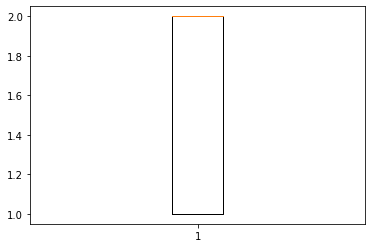



X3
0.0       14
1.0    10572
2.0    14009
3.0     4909
4.0      123
5.0      280
6.0       51
dtype: int64
count    29958.000000
mean         1.853094
std          0.790471
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: X3, dtype: float64


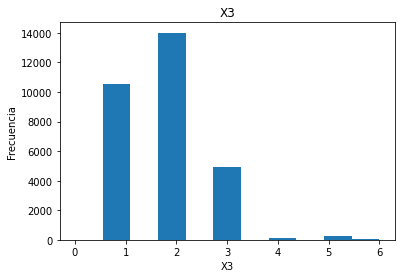

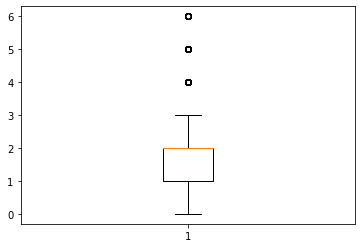



X4
0.0       54
1.0    13643
2.0    15939
3.0      322
dtype: int64
count    29958.000000
mean         1.551739
std          0.521952
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: X4, dtype: float64


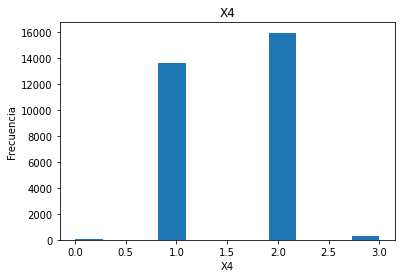

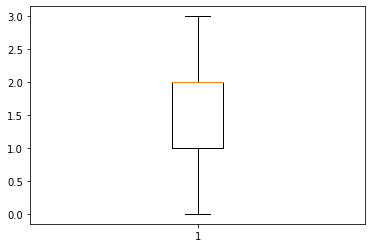

In [48]:
#Calcularemos para las variables numéricas sus histogramas y boxplots
for f in df[categoricas].columns:
  print (df.groupby([f]).size())
  print(df[f].describe(include='all'))
  plt.hist(df[f], bins=11)
  plt.xlabel(f) 
  plt.ylabel('Frecuencia') 
  plt.title(f)
  plt.show()
  print("\n")
  plt.boxplot(df[f])
  plt.show()
  print("\n")

  #Se observa que X2 contiene solamente 2 clases diferentes, X3 contiene 7 clases, X4 4 clases
  

6. Escala los datos, si consideras necesario

In [90]:
df_x = df.iloc[:,1:24]  #Tiramos la variable de Id y Y

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Imputamos datos faltantes y escalamos los numéricos
pipeline_category = Pipeline(steps = [
    ('input_category', SimpleImputer(strategy='most_frequent'))])

pipeline_numerico = Pipeline(steps = [
    ('input_category', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

columnasTransformer = ColumnTransformer([
    ( 'pipline_category', pipeline_category, categoricas),
    ( 'pipline_numerico', pipeline_numerico, numericas),
])

df_nuevo = columnasTransformer.fit_transform(df_x)

In [92]:
df_nuevo.shape

(29958, 23)

7. Reduce las dimensiones con PCA, si consideras necesario.


       a)   Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70% 

       b)   Indica la importancia de las variables en cada componente



In [93]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(df_nuevo)

PCA()

In [94]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.7028,2.1918,1.2424,1.0513,0.9776,0.9444,0.9378,0.9355,0.8871,0.8596,...,0.5947,0.5176,0.5016,0.4858,0.4482,0.4176,0.2650,0.2020,0.1590,0.1524
Proportion of variance,0.3144,0.2068,0.0664,0.0476,0.0411,0.0384,0.0379,0.0377,0.0339,0.0318,...,0.0152,0.0115,0.0108,0.0102,0.0086,0.0075,0.0030,0.0018,0.0011,0.0010
Cumulative proportion,0.3144,0.5212,0.5877,0.6352,0.6764,0.7148,0.7526,0.7903,0.8242,0.8560,...,0.9445,0.9560,0.9668,0.9770,0.9856,0.9931,0.9962,0.9979,0.9990,1.0000


In [ ]:
#Nos vamos a quedar con los primeros 10 componentes que explican aproximadamente el 85% de la varianza

In [99]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_x.columns
                                )
pcsComponents_df.iloc[:,:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
X1,-0.011155,0.007443,-0.002585,-0.045132,0.009958,-0.000744,-0.008713,0.002550,-0.006880,0.002098
X2,0.025494,-0.050464,-0.054017,0.282639,0.034752,0.042676,0.174543,0.028082,-0.063213,0.012895
X3,0.001397,-0.016696,0.016351,-0.257626,-0.011508,0.008300,0.008016,0.002160,0.006325,-0.004674
X4,0.237736,-0.233080,-0.065667,0.043739,-0.344377,0.035385,0.434040,-0.043976,0.090059,0.079450
X5,0.301978,-0.277584,-0.003978,0.042049,-0.312369,0.024387,0.275896,-0.040657,0.054527,0.019410
X6,0.311843,-0.285436,0.077980,0.032800,-0.115344,0.044875,0.044451,-0.026209,-0.032691,-0.174788
X7,0.311316,-0.275205,0.133016,0.025030,0.102141,0.034011,-0.214439,0.039060,-0.090581,-0.008432
X8,0.301594,-0.250567,0.156579,0.005155,0.229127,-0.031022,-0.306086,0.041351,0.057720,0.033376
X9,0.294726,-0.229615,0.161139,-0.005464,0.275284,-0.151814,-0.314750,-0.014548,-0.007513,0.062845
X10,-0.002440,0.293028,0.086141,0.102931,-0.094883,-0.050965,-0.303131,-0.060770,0.077772,-0.001454


In [100]:
#Para mejor visualización vamos a calcular sobre los 10 PC seleccionados la variable que más le está aportando
pcsComponents_df.iloc[:,:10].abs().idxmax()

#Como resultado vemos que los PC se afecta por las variables 6, 10, 19, 11, 22, 21, 4, 22, 20 y 18 respectivamente

PC1      X6
PC2     X10
PC3     X19
PC4     X11
PC5     X22
PC6     X21
PC7      X4
PC8     X22
PC9     X20
PC10    X18
dtype: object

8. Elabora los histogramas de los atributos para visualizar su distribución

In [ ]:
# Los histogramas se calcularon sobre las variables originales en los puntos 4 y 5 cuando se estaban analizando

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

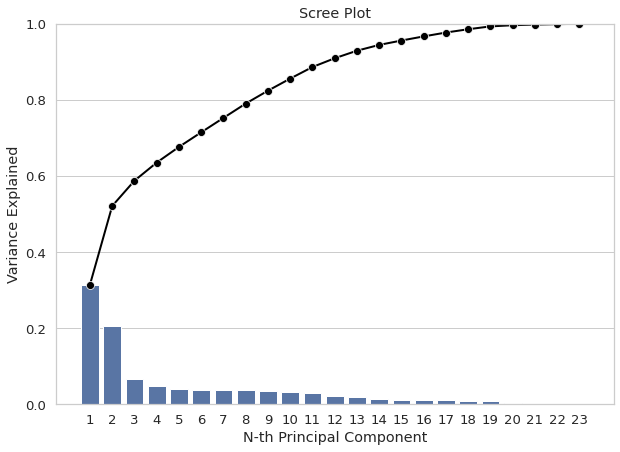

In [101]:
#En la siguiente gráfica podemos ver como cada PCA va aportando a la varianza
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

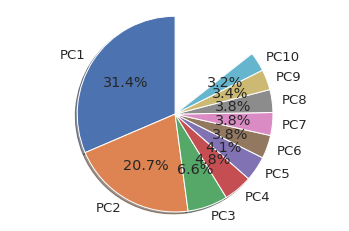

In [125]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pcsComponents_df.iloc[:,:10].columns
sizes = pcs.explained_variance_ratio_[0:10]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

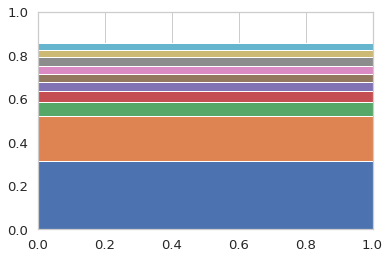

In [159]:
x = np.arange(0, 2, 1)

y1 = [pcs.explained_variance_ratio_[0:1]]
y2 = [pcs.explained_variance_ratio_[1:2]]
y3 = [pcs.explained_variance_ratio_[2:3]]
y4 = [pcs.explained_variance_ratio_[3:4]]
y5 = [pcs.explained_variance_ratio_[4:5]]
y6 = pcs.explained_variance_ratio_[5:6]
y7 = pcs.explained_variance_ratio_[6:7]
y8 = pcs.explained_variance_ratio_[7:8]
y9 = pcs.explained_variance_ratio_[8:9]
y10 = pcs.explained_variance_ratio_[9:10]

y = np.vstack([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10])

fig, ax = plt.subplots()
ax.set(xlim=(0, 1), 
       ylim=(0, 1))
ax.stackplot(x, y)

plt.show()

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [ ]:
#Los 3 gráficos buscan, de manera visual diferente, mostrar las diferencias entre las varianzas que aporta cada uno de los PC y como de forma acumulativa van explicando cada vez más.
#Sería util para la toma de decisiones ya que permite decidir informadamente cuantos y cuales PCA se desean utilizar para el modelado.
#También al saber que variable original es la que tiene mayor peso en el PCA brinda de cierta manera una interpretación razonable sobre que variables están moviendo y pueden explicar
#A veces saber esa información puede ayudar a enfocar un objetivo para las diferentes estrategias, por ejemplo en este caso vemos que la historia de pagos anteriores es muy importante